In [1]:
import pandas as pd

temperature_df = pd.read_excel('dataset/Temp_SRS_1Jan1964_to_31Oct2020.xlsx')
rainfall_df = pd.read_csv('dataset/Rainfall_at_SRS_30Nov1960_to_18Nov2020.csv')

rainfall_df = rainfall_df.fillna(0)

temperature_df['DATE'] = pd.to_datetime(temperature_df['DATE'], format='%Y-%m-%d')
rainfall_df['DATE'] = pd.to_datetime(rainfall_df['DATE'], format='%m/%d/%Y')

rain_temp_df = pd.merge(temperature_df, rainfall_df, on='DATE')

print(rain_temp_df.head(10))

        DATE  LOW TEMP  HIGH TEMP  200-F Rainfall (inches/day)
0 1964-01-01        30         36                         0.01
1 1964-01-02        25         50                         0.00
2 1964-01-03        32         64                         0.00
3 1964-01-04        43         59                         0.00
4 1964-01-05        39         61                         0.00
5 1964-01-06        50         65                         0.10
6 1964-01-07        53         66                         0.20
7 1964-01-08        42         53                         2.01
8 1964-01-09        42         56                         0.60
9 1964-01-10        29         42                         0.00


,Description,Value
0,Session id,7446
1,Target,HIGH TEMP
2,Target type,Regression
3,Original data shape,"(20756, 4)"
4,Transformed data shape,"(20756, 6)"
5,Transformed train set shape,"(14529, 6)"
6,Transformed test set shape,"(6227, 6)"
7,Numeric features,2
8,Date features,1
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,4.6519,35.9418,5.9920,0.8390,0.0967,0.0689,0.4090
lightgbm,Light Gradient Boosting Machine,4.6495,36.0036,5.9970,0.8388,0.0968,0.0689,0.0830
gbr,Gradient Boosting Regressor,4.7160,36.7967,6.0632,0.8352,0.0977,0.0699,0.1600
xgboost,Extreme Gradient Boosting,4.7364,37.8530,6.1490,0.8304,0.0993,0.0702,0.1200
rf,Random Forest Regressor,4.8460,39.1858,6.2566,0.8245,0.1002,0.0716,0.4530
et,Extra Trees Regressor,5.0792,43.1878,6.5696,0.8065,0.1045,0.0748,0.3650
knn,K Neighbors Regressor,5.0943,43.7375,6.6097,0.8041,0.1054,0.0756,0.0260
ada,AdaBoost Regressor,5.4436,48.7036,6.9775,0.7819,0.1121,0.0818,0.0880
en,Elastic Net,6.6723,70.8092,8.4123,0.6832,0.1329,0.1014,0.0260
dt,Decision Tree Regressor,6.4616,71.9835,8.4830,0.6773,0.1418,0.0944,0.0300


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

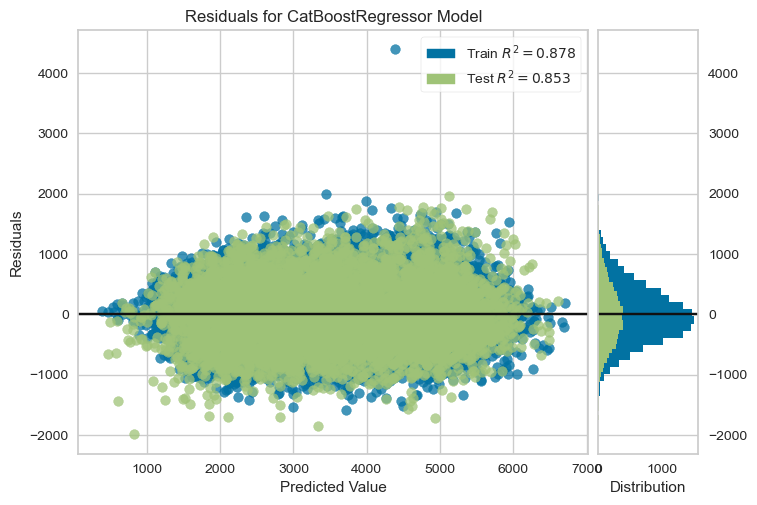

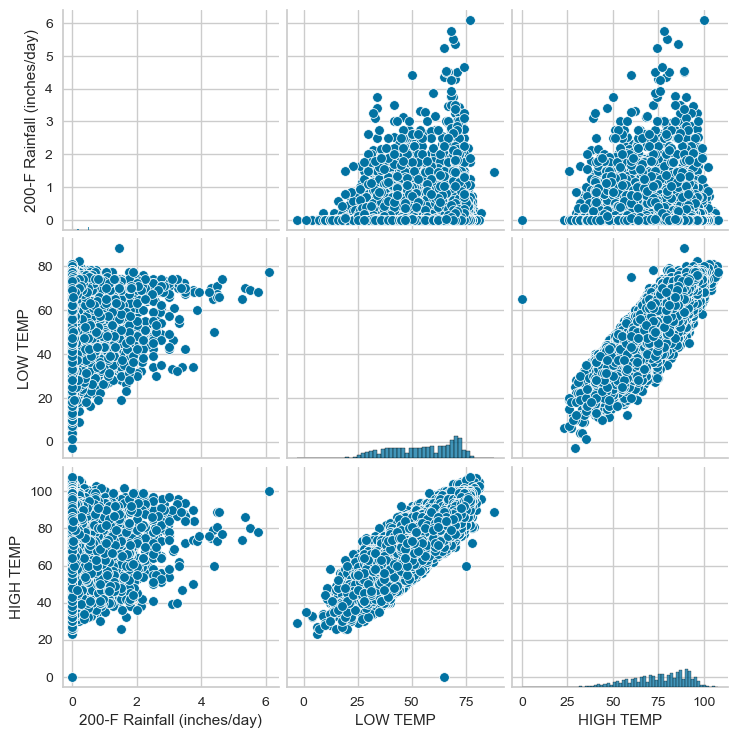

In [2]:
from pycaret.regression import *
regression_setup = setup(rain_temp_df, target='HIGH TEMP', normalize=True, transform_target=True)

best = compare_models()
# help(plot_model)
plot_model(best, plot='residuals')

import seaborn as sns
variables = ['200-F Rainfall (inches/day)', 'LOW TEMP', 'HIGH TEMP']
selected_data = rain_temp_df[variables]
sns.pairplot(selected_data)
